## Notebook to check pre-thekla that the results make sense.

Load in, plot energy. thats all

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tables as tb
from matplotlib import colors
from tqdm import tqdm
import json



from typing          import Optional
from typing          import Union
from typing          import Callable
from typing          import Any

from concurrent.futures import ProcessPoolExecutor

import sys,os,os.path
from pathlib import Path
sys.path.append("/scratch/halmazan/NEXT/IC_include-cluster-dropping/IC/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append("/scratch/halmazan/NEXT/testing/notebooks/")
os.environ['ICTDIR']='/scratch/halmazan/NEXT/IC_include-cluster-dropping/'

from invisible_cities.io.dst_io           import load_dst, load_dsts, df_writer
from invisible_cities.io.hits_io          import hits_writer
from invisible_cities.core                import tbl_functions   as tbl
from invisible_cities.core.core_functions import in_range
import invisible_cities.core.core_functions                   as     coref
from invisible_cities.io.hits_io          import hits_from_df
from invisible_cities.evm.nh5             import HitsTable
from invisible_cities.types.symbols       import NormStrategy
from invisible_cities.types.ic_types      import NoneType
from invisible_cities.reco.corrections    import read_maps, get_df_to_z_converter, apply_all_correction
from invisible_cities.evm.event_model     import HitCollection

#from invisible_cities.cities import beersheba as beerfun
import glob
from tqdm import tqdm
# To get these back, figure out the compilation properly!
#import functions.functions_HE as func
#from invisible_cities.cities.beersheba    import hitc_to_df_


In [21]:


#RUN_NUMBER = '15593'
#TIMESTAMP  = '230725'

# solo file
##data = load_dst('/scratch/halmazan/NEXT/N100_LPR/15589/sophronia/110725/run_15589_ldc1_110725.h5', 'RECO', 'Events')
# or many files
###folder_path = f'/scratch/halmazan/NEXT/N100_LPR/{RUN_NUMBER}/sophronia/{TIMESTAMP}/ldc1/'
###file_names = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
#folder_path = f'/scratch/halmazan/NEXT/PROCESSING/fedora/data/040925/ldc1/'
#folder_path = f'/data/halmazan/NEXT/N100_LPR_MC/040925/prod/sophronia/ldc1/'
folder_path = f'/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/'
file_names = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
file_paths = [os.path.join(folder_path, f) for f in file_names]
print(file_paths)

data = load_dsts(file_paths, 'RECO', 'Events')
#data = load_dsts(file_paths, 'DST', 'Events')
# or thekla post cuts
#data = load_dst('/scratch/halmazan/NEXT/N100_LPR/15590/thekla/120725/ldc1/run_15590_0001_ldc1_120725_thekla.h5', 'RECO', 'Events')



['/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_1_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_2_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_3_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_4_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_5_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_6_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_7_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_8_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_9_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_10_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_11_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophronia_12_208Tl.h5', '/data/halmazan/NEXT/N100_LPR_MC/150925/sophronia/ldc1/sophr

In [16]:
display(data)
print(data.columns.values)

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,0,1.754966e+06,1,186.935546,279.782370,1,57.625,29.225,0.0,0.0,546.473916,5.623188,2977.000000,-1.0,0.009233,-1,-1.0
1,0,1.754966e+06,1,186.935546,279.782370,1,57.625,13.675,0.0,0.0,548.179333,5.623188,496.614852,-1.0,0.001549,-1,-1.0
2,0,1.754966e+06,1,186.935546,279.782370,1,57.625,44.775,0.0,0.0,548.179333,16.985508,1500.084204,-1.0,0.004643,-1,-1.0
3,0,1.754966e+06,1,186.935546,279.782370,1,73.175,29.225,0.0,0.0,548.179333,6.724638,593.889952,-1.0,0.001845,-1,-1.0
4,0,1.754966e+06,1,186.935546,279.782370,1,73.175,44.775,0.0,0.0,548.179333,6.492754,573.410992,-1.0,0.001776,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29476480,5700166,5.700167e+12,3,134.716775,50.959965,1,134.375,122.525,0.0,0.0,1150.962585,5.971014,1194.309543,-1.0,0.004032,-1,-1.0
29476481,5700166,5.700167e+12,3,134.716775,50.959965,1,104.275,106.975,0.0,0.0,1152.700736,6.260870,1118.634140,-1.0,0.003745,-1,-1.0
29476482,5700166,5.700167e+12,3,134.716775,50.959965,1,134.375,106.975,0.0,0.0,1152.700736,8.000000,1429.365860,-1.0,0.004817,-1,-1.0
29476483,5700166,5.700167e+12,3,134.716775,50.959965,1,119.825,91.425,0.0,0.0,1154.444107,5.449275,5365.000000,-1.0,0.017841,-1,-1.0


['event' 'time' 'npeak' 'Xpeak' 'Ypeak' 'nsipm' 'X' 'Y' 'Xrms' 'Yrms' 'Z'
 'Q' 'E' 'Qc' 'Ec' 'track_id' 'Ep']


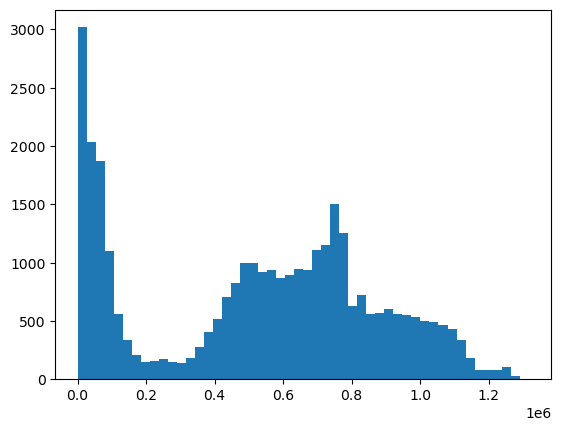

AttributeError: 'DataFrame' object has no attribute 'S1q'

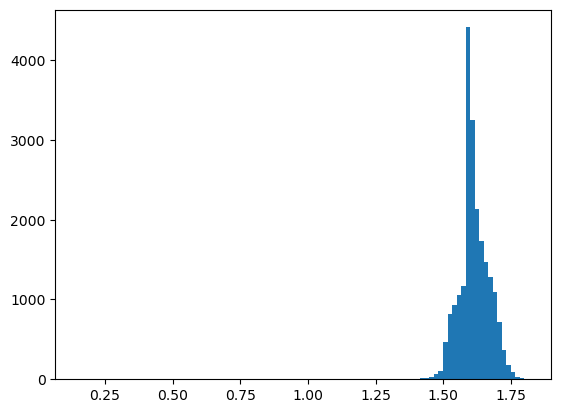

In [22]:
plt.hist(data.groupby('event').Ec.sum(), bins = 100)
plt.show()

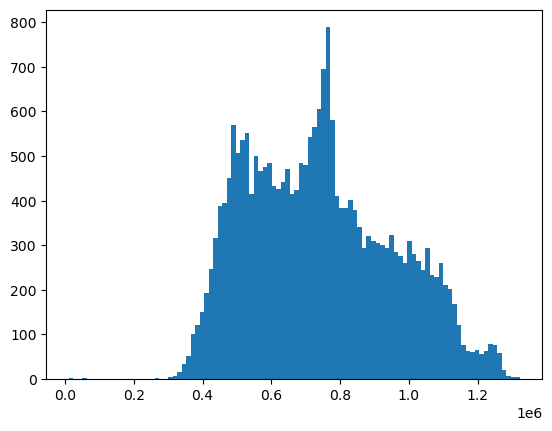

In [18]:
plt.hist(data.groupby('event').E.sum(), bins = 100)
plt.show()

In [6]:
def raw_plotter(q, evt, pitch = 15.55):
    '''
    just plots the hits, nothing smart
    '''

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    xx = np.arange(q.X.min(), q.X.max() + pitch, pitch)
    yy = np.arange(q.Y.min(), q.Y.max() + pitch, pitch)
    zz = np.sort(q.Z.unique())

    zz_diff = np.diff(zz)
    zz_padded = []
    for i, z in enumerate(zz[:-1]):
        zz_padded.append(z)
        if zz_diff[i] > 4:
            zz_padded.extend(np.arange(z + 4, zz[i + 1], 4))
    zz_padded.append(zz[-1])
    zz = np.array(zz_padded)

    axes[0].hist2d(q.X, q.Y, bins=[xx, yy], weights=q.Q, cmin=0.0001);
    axes[0].set_xlabel('X (mm)');
    axes[0].set_ylabel('Y (mm)');

    axes[1].hist2d(q.X, q.Z, bins=[xx, zz], weights=q.Q, cmin=0.0001);
    axes[1].set_xlabel('X (mm)');
    axes[1].set_ylabel('Z (mm)');


    axes[2].hist2d(q.Y, q.Z, bins=[yy, zz], weights=q.Q, cmin=0.0001);
    axes[2].set_xlabel('Y (mm)');
    axes[2].set_ylabel('Z (mm)');
    fig.suptitle(f"evt {evt}")
    plt.show(fig)


EVT: 4680000
-0.003777148253068933


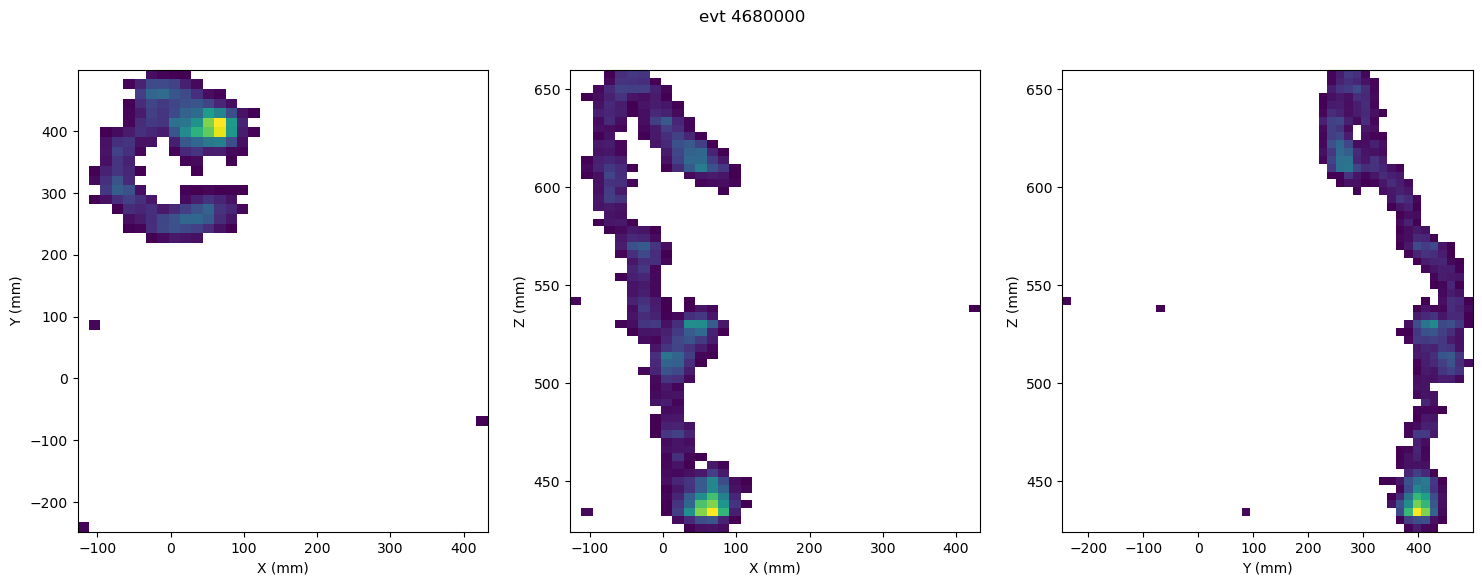

EVT: 4680002
0.0


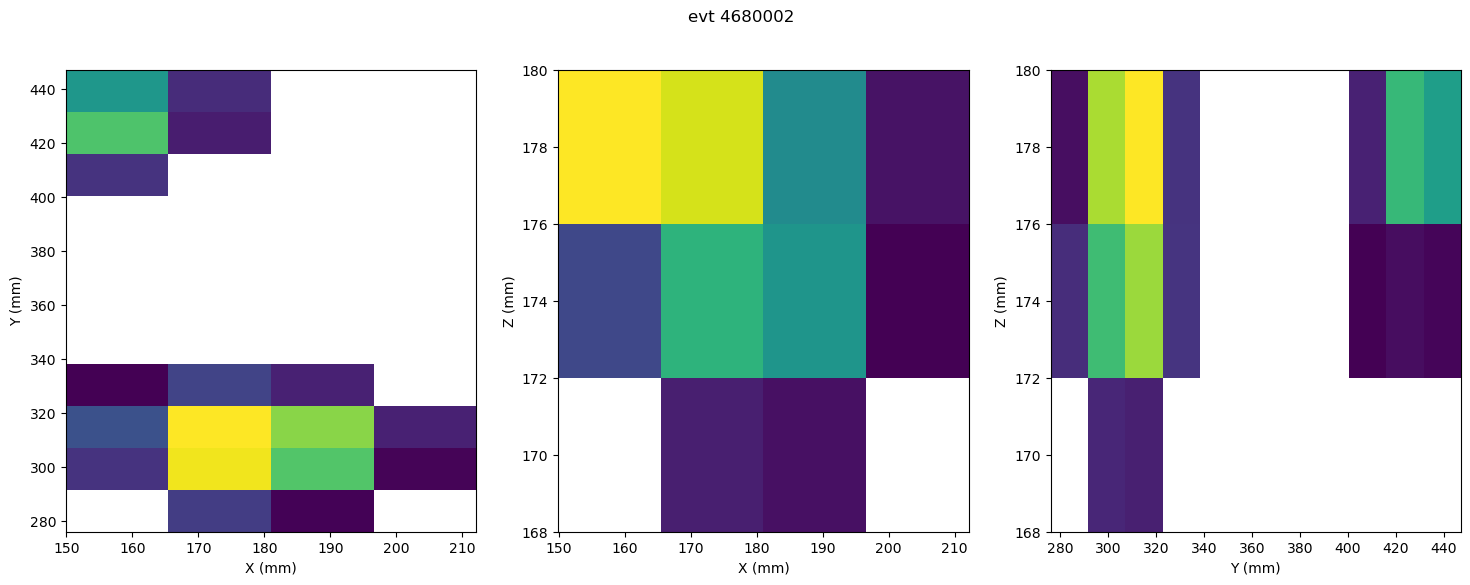

EVT: 4680004
-0.1660377358490566


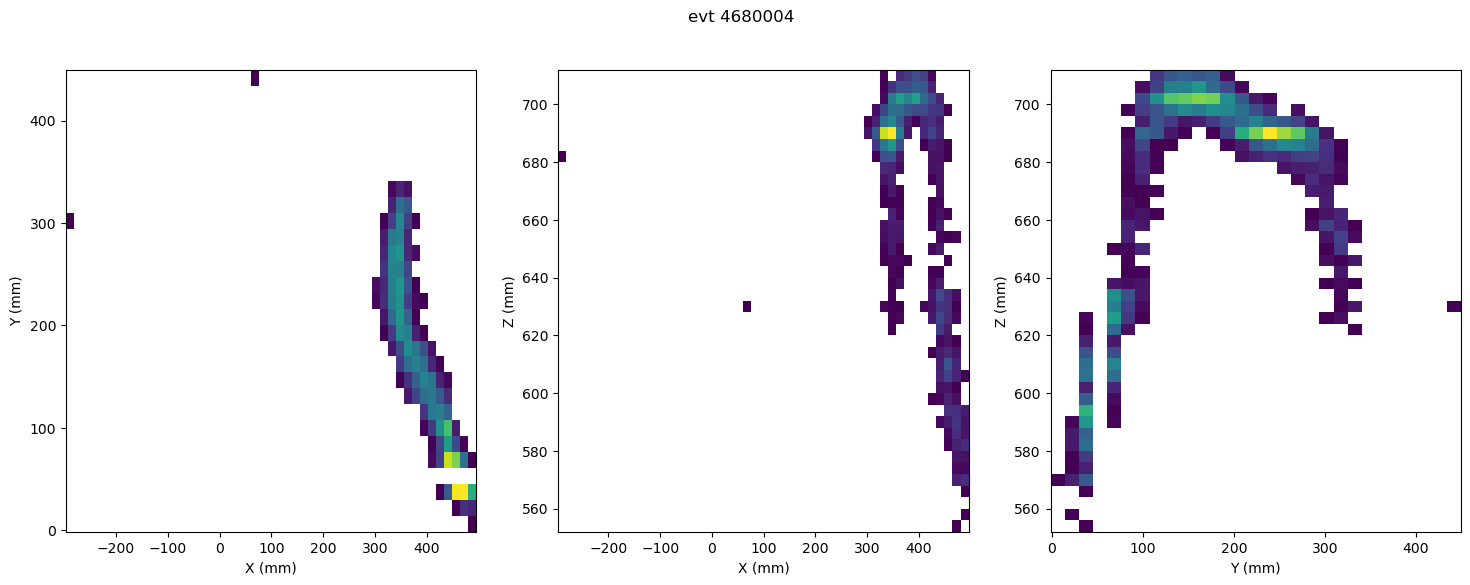

EVT: 4680006
0.6019417475728155


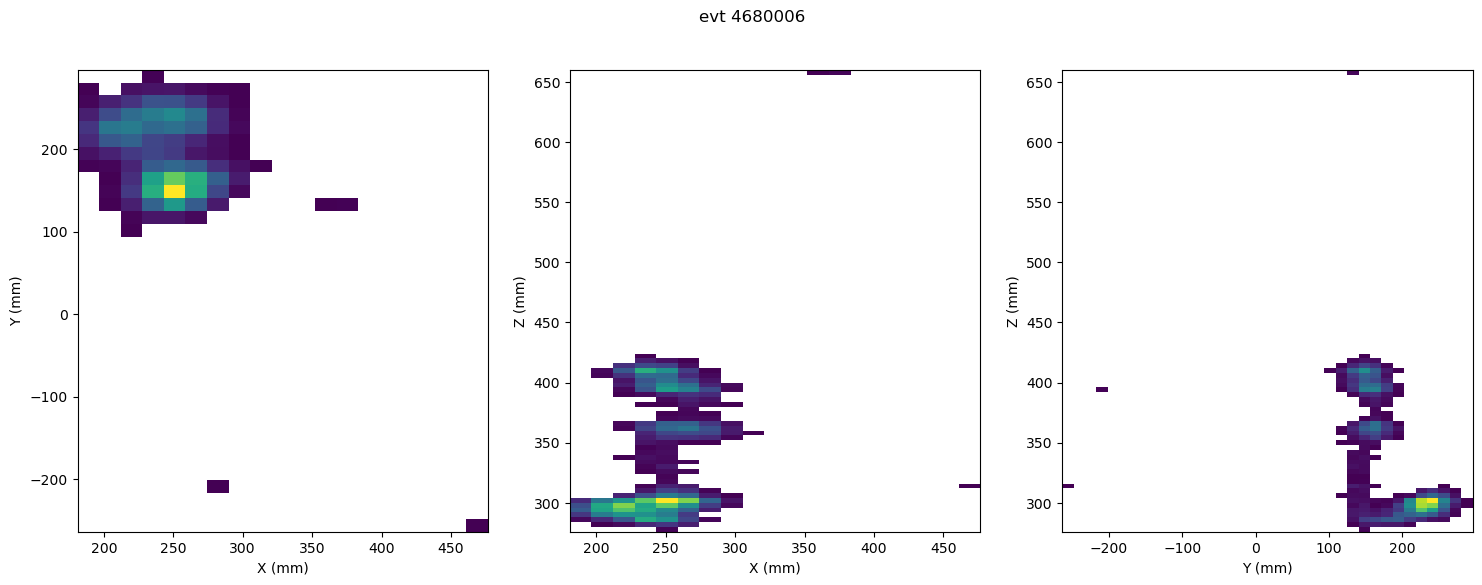

EVT: 4680008
-0.1087378640776699


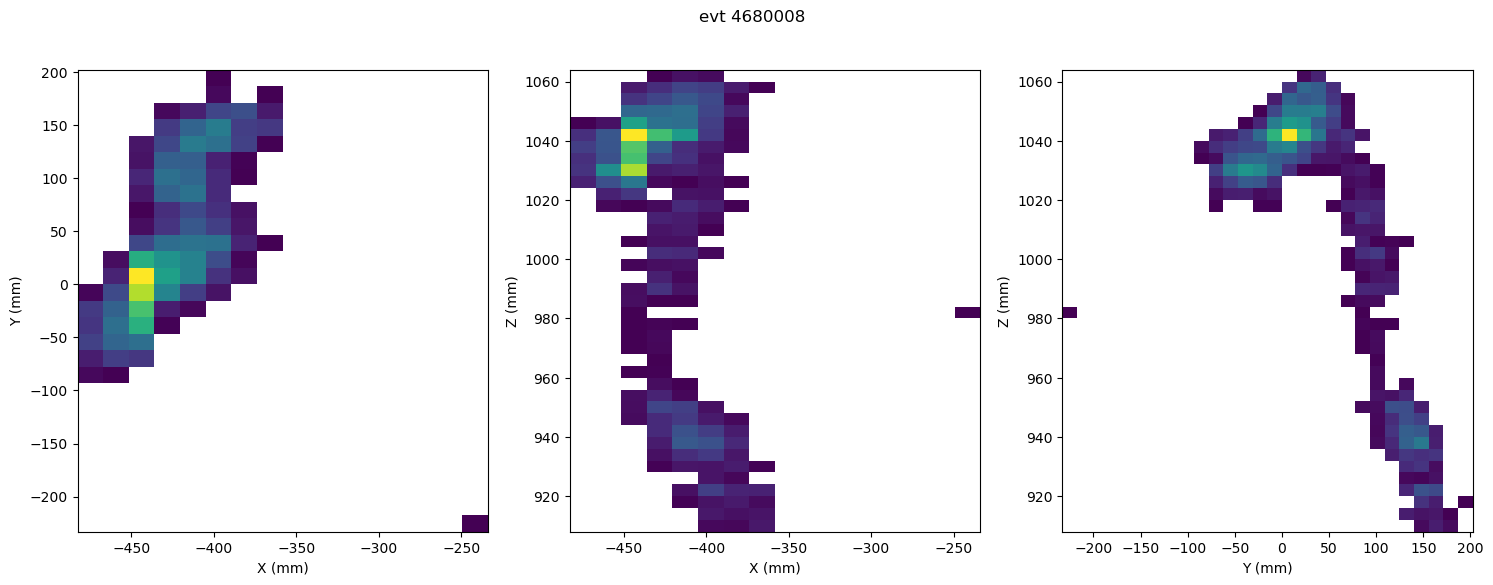

EVT: 4680010
0.15602836879432624


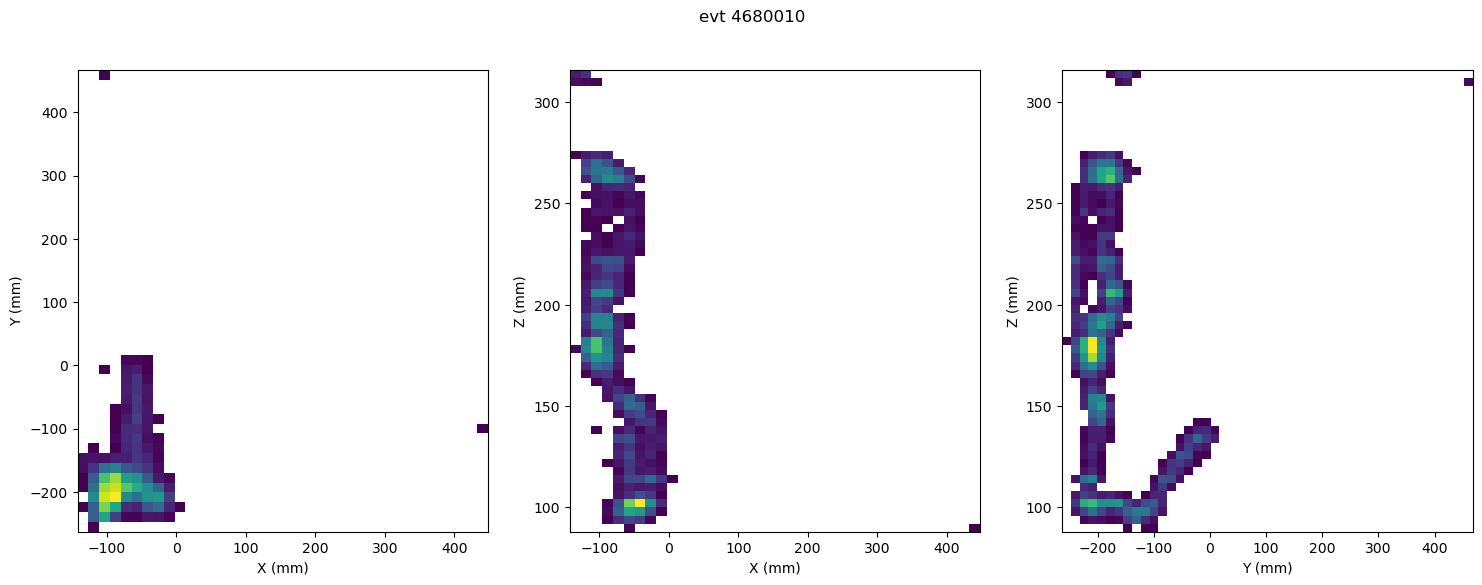

EVT: 4680012
0.590818363273453


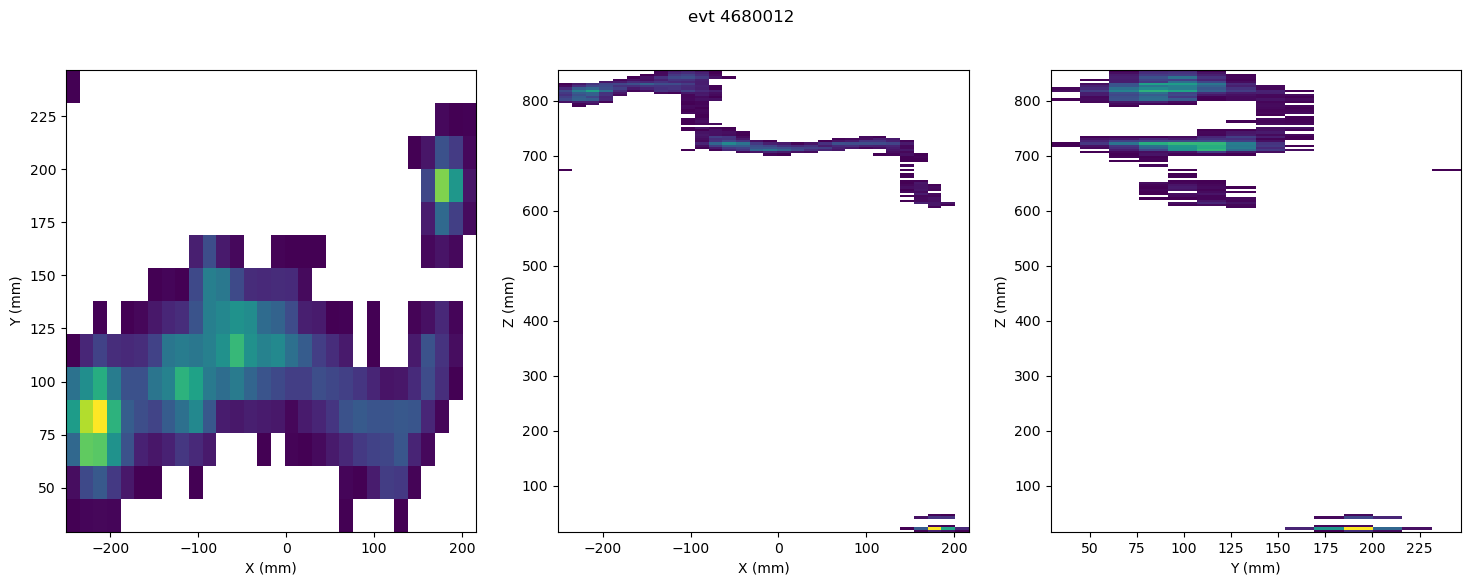

In [7]:
stopper = 5
for i, (evt, df) in enumerate(data.groupby('event')):
    print('='*20)
    print('='*20)
    print(f'EVT: {evt}')
    print(np.average(np.diff(df.Z.values)))
    raw_plotter(df, evt)

    if i > stopper:
        break

# try cutting at differing PEs

In [12]:
q_cut = 5
drop_dist       = [16, 16, 4]
cut_sensors       = beerfun.cut_over_Q   (q_cut, ['E', 'Ec'])
drop_sensors      = beerfun.drop_isolated(drop_dist, ['E', 'Ec'])

hits_cut = coref.timefunc(cut_sensors)(data.copy())
hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy())

Time spent in cut_over_Q: 0.18718886375427246 s
Time spent in drop_isolated: 0.7626099586486816 s


## cutting

EVT: 5230
1.5164671410126682


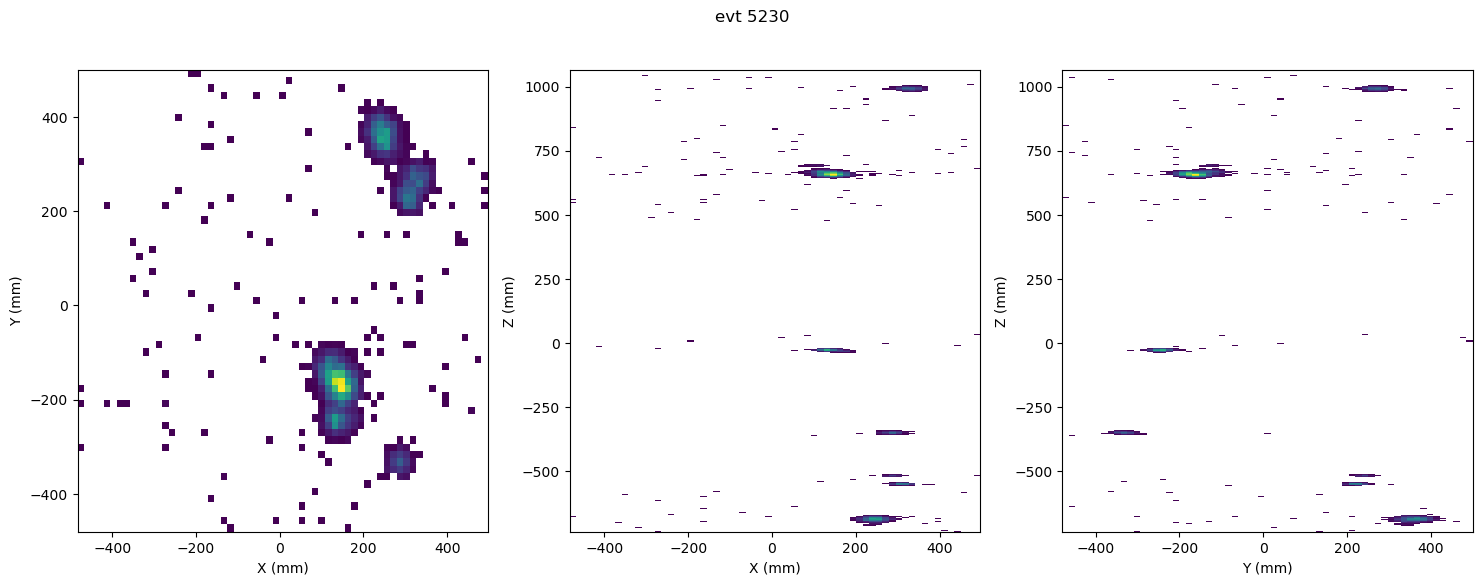

EVT: 5398
1.725579475308642


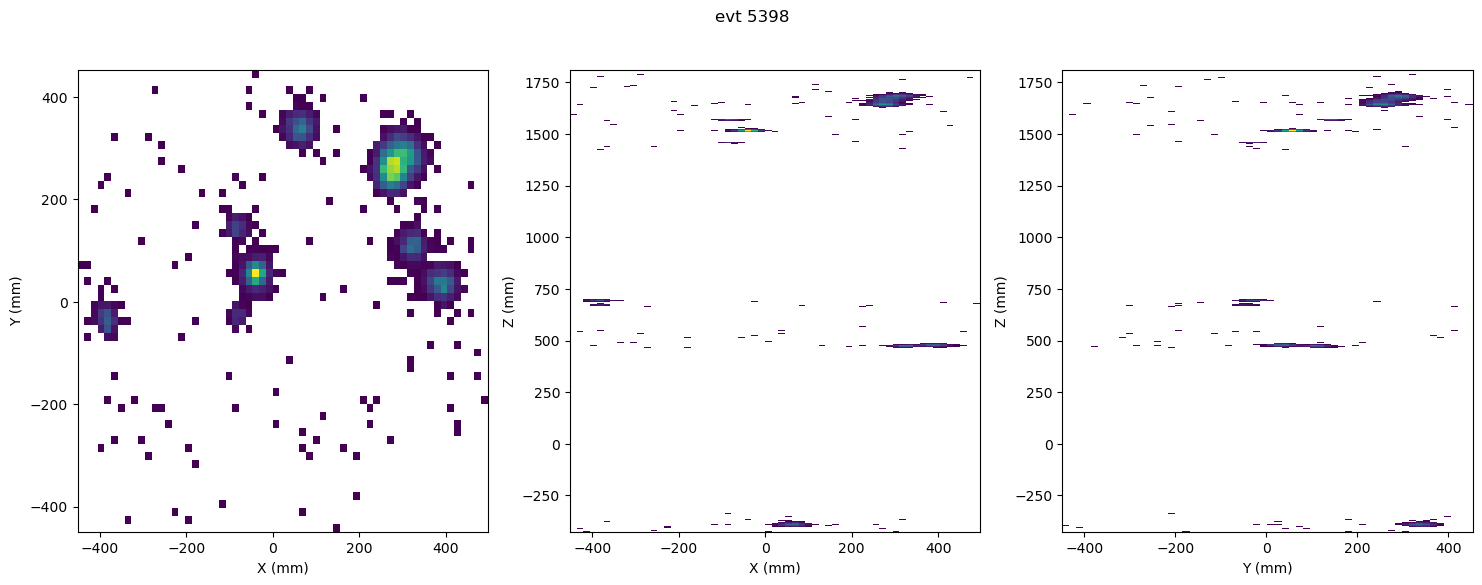

EVT: 5587
0.38926154680719155


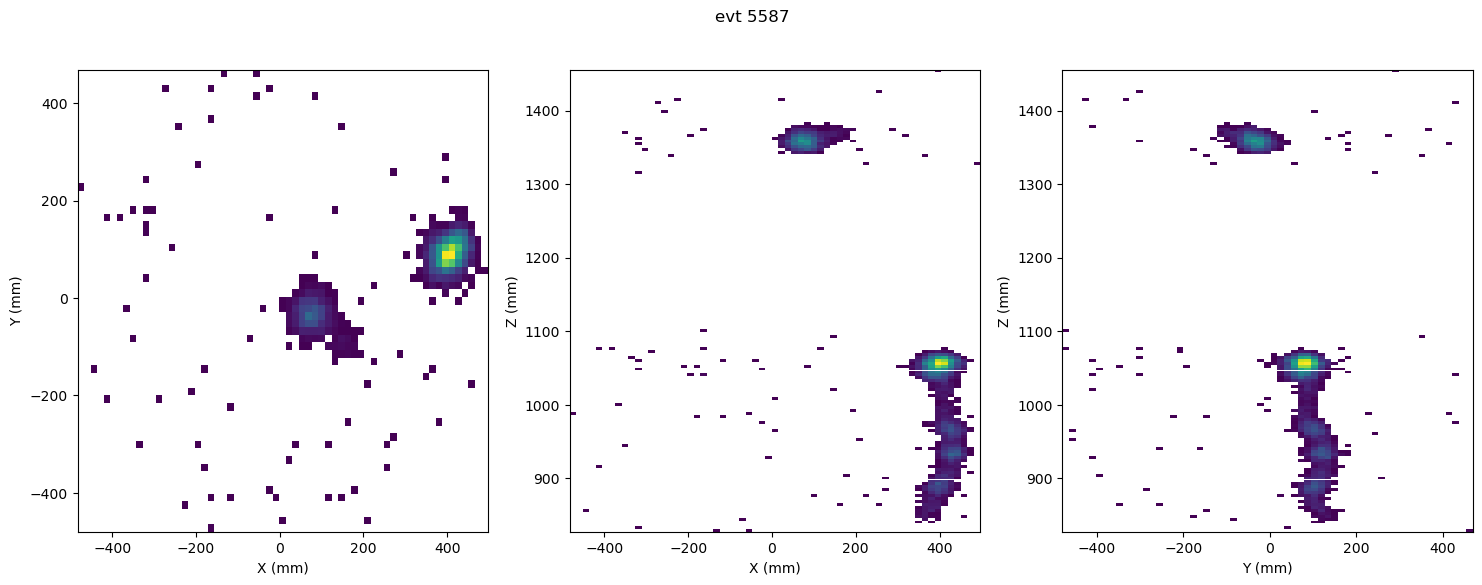

EVT: 5650
0.3474796235380117


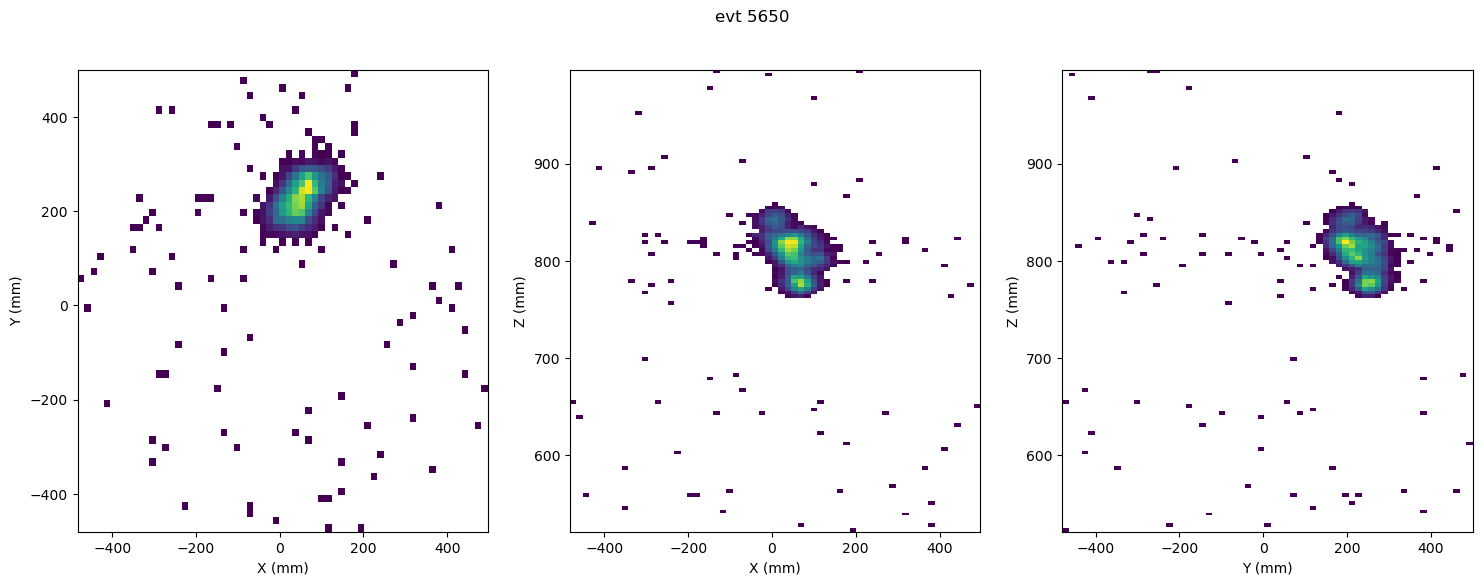

EVT: 5734
0.15314154689863843


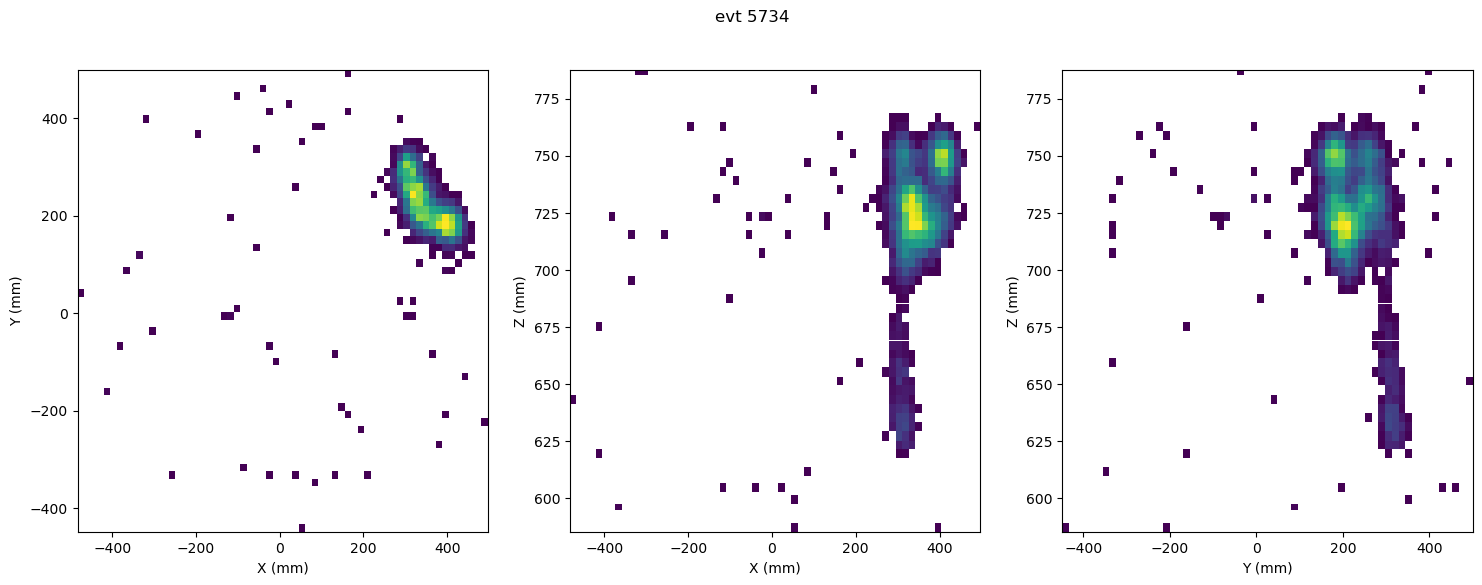

EVT: 1717199
0.7893372261107727


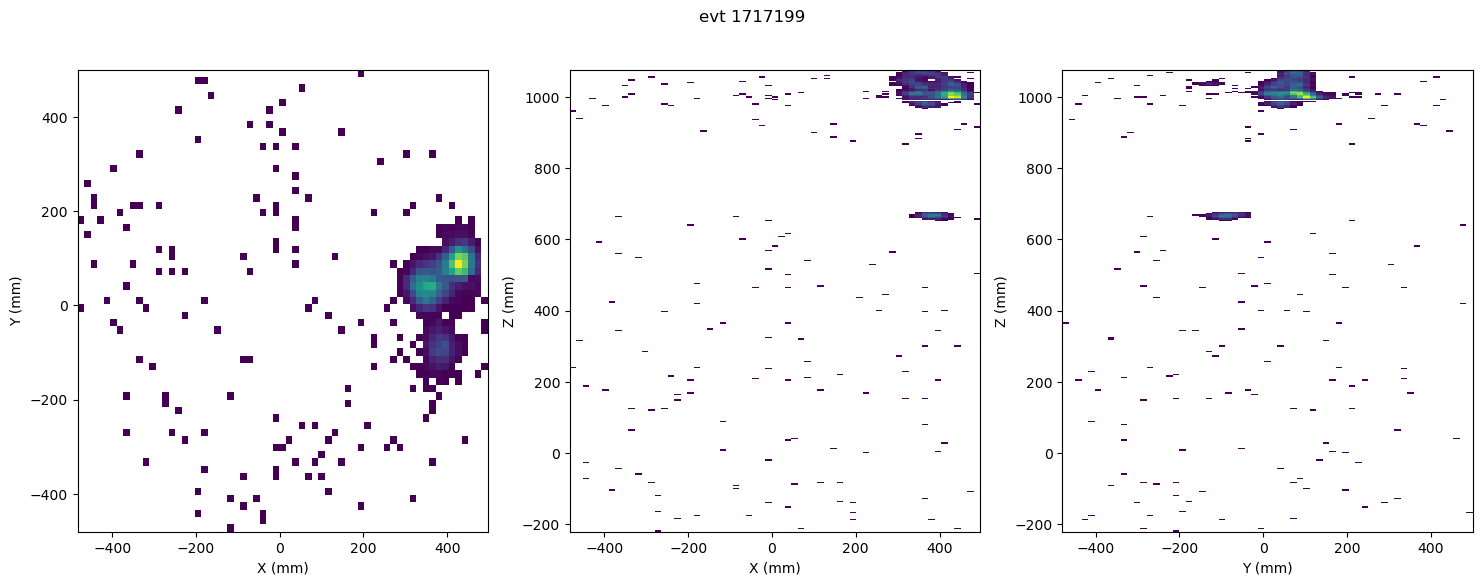

EVT: 1717255
0.9782366678596994


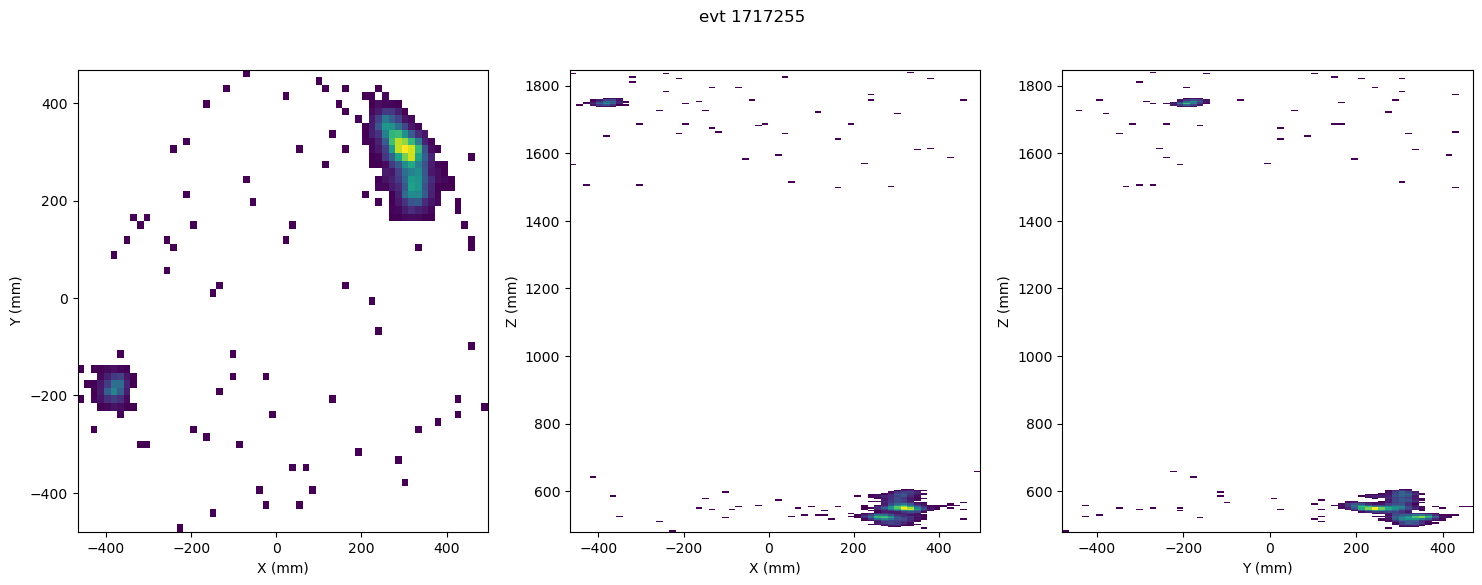

In [13]:
stopper = 5
for i, (evt, df) in enumerate(hits_cut.groupby('event')):
    print('='*20)
    print('='*20)
    print(f'EVT: {evt}')
    print(np.average(np.diff(df.Z.values)))
    raw_plotter(df, evt)

    if i > stopper:
        break

## dropping

EVT: 5230
1.6260963010959717


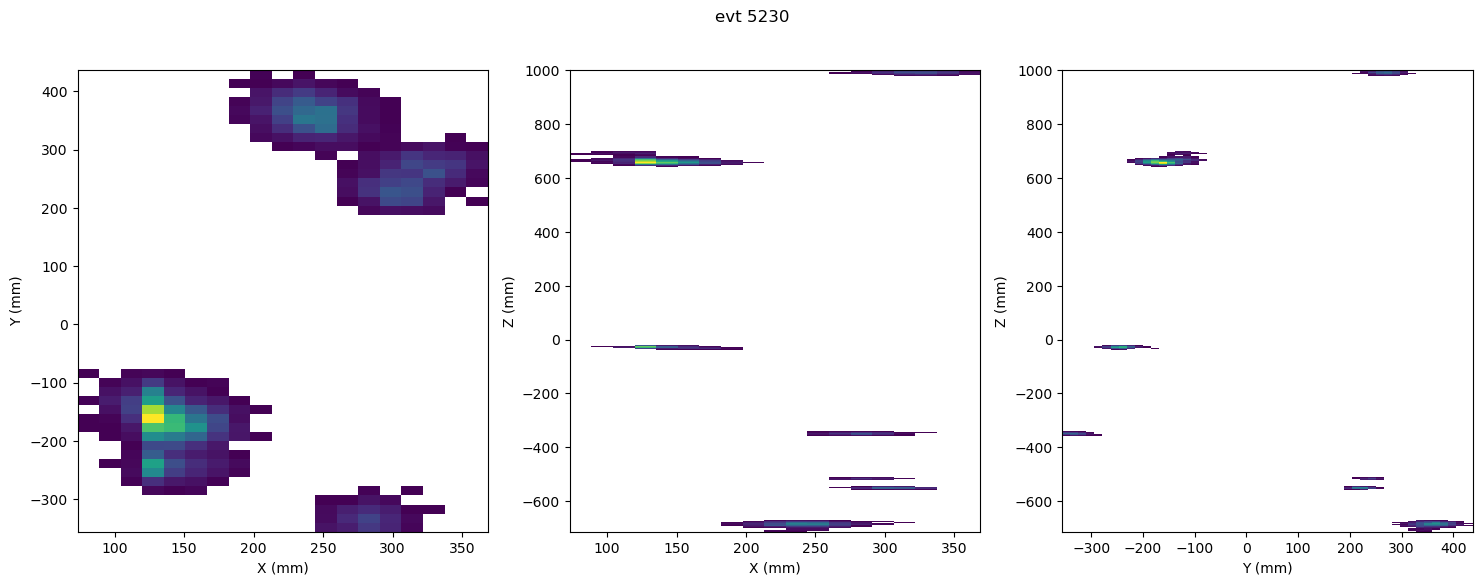

EVT: 5398
1.794298664529915


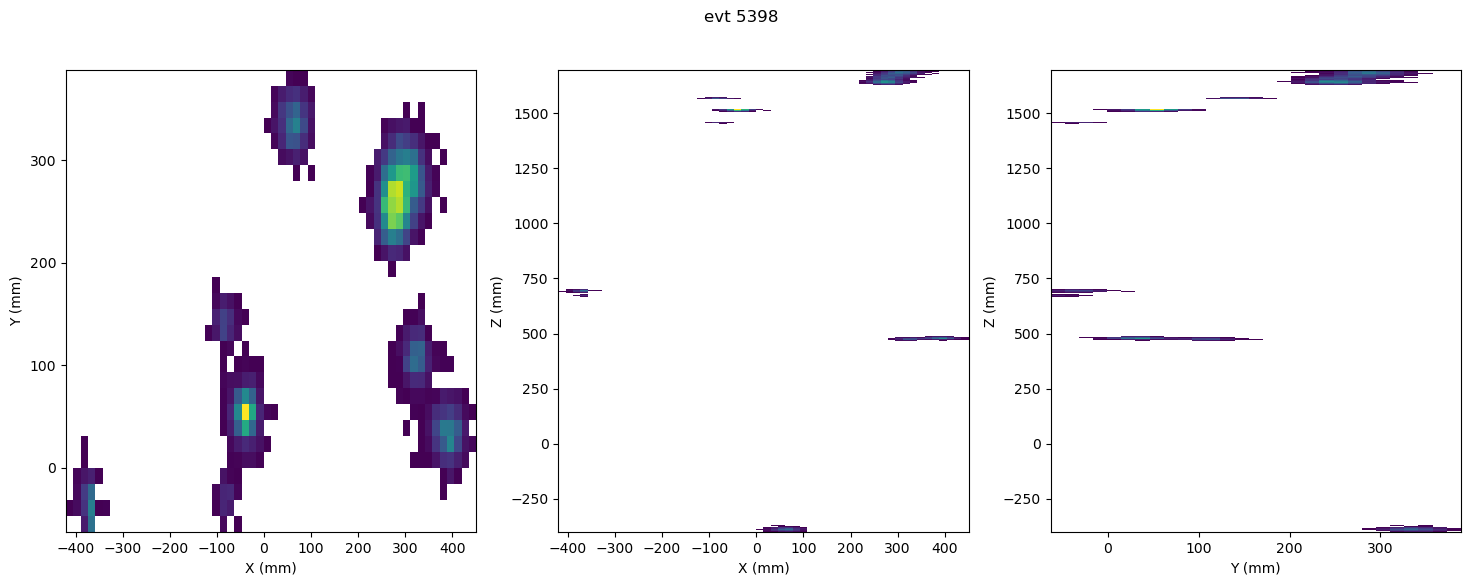

EVT: 5587
0.35452783235101515


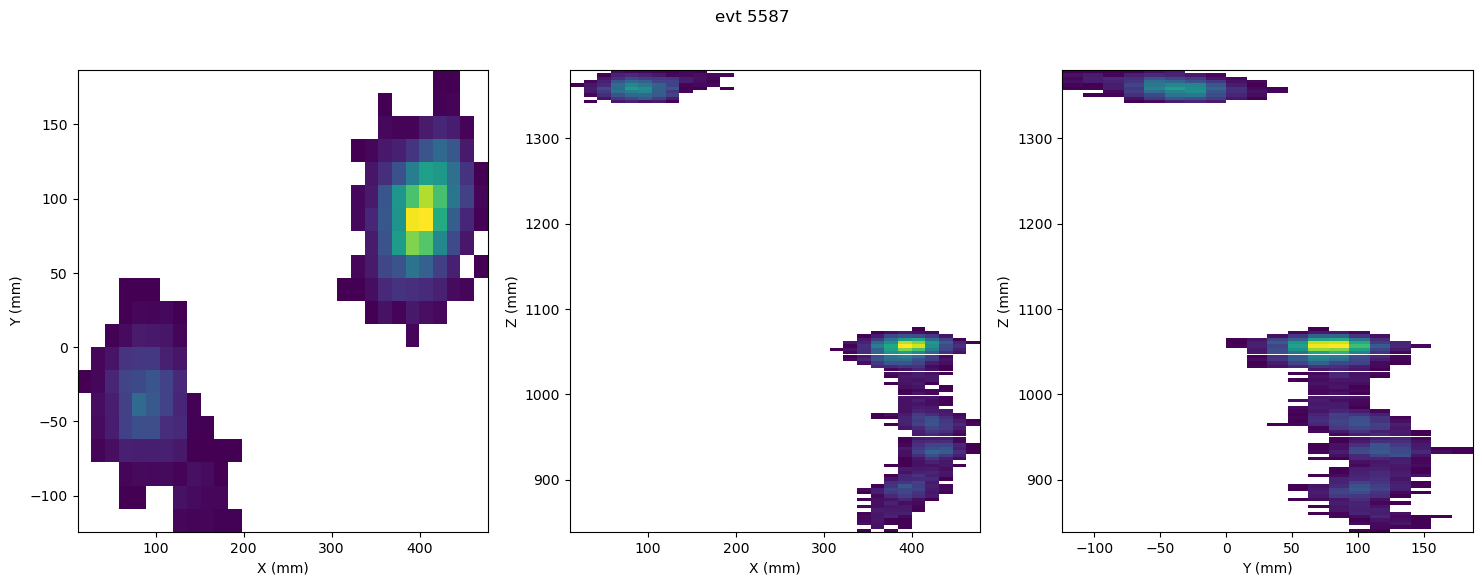

EVT: 5650
0.07527519762845848


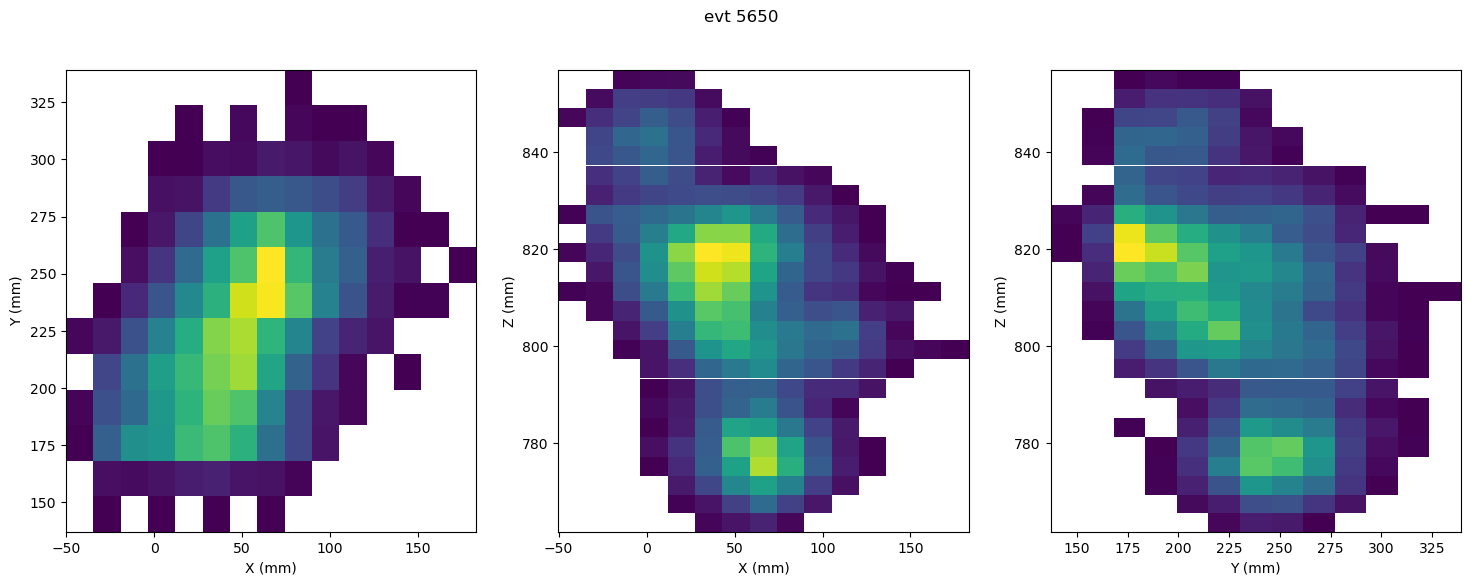

EVT: 5734
0.11696825396825397


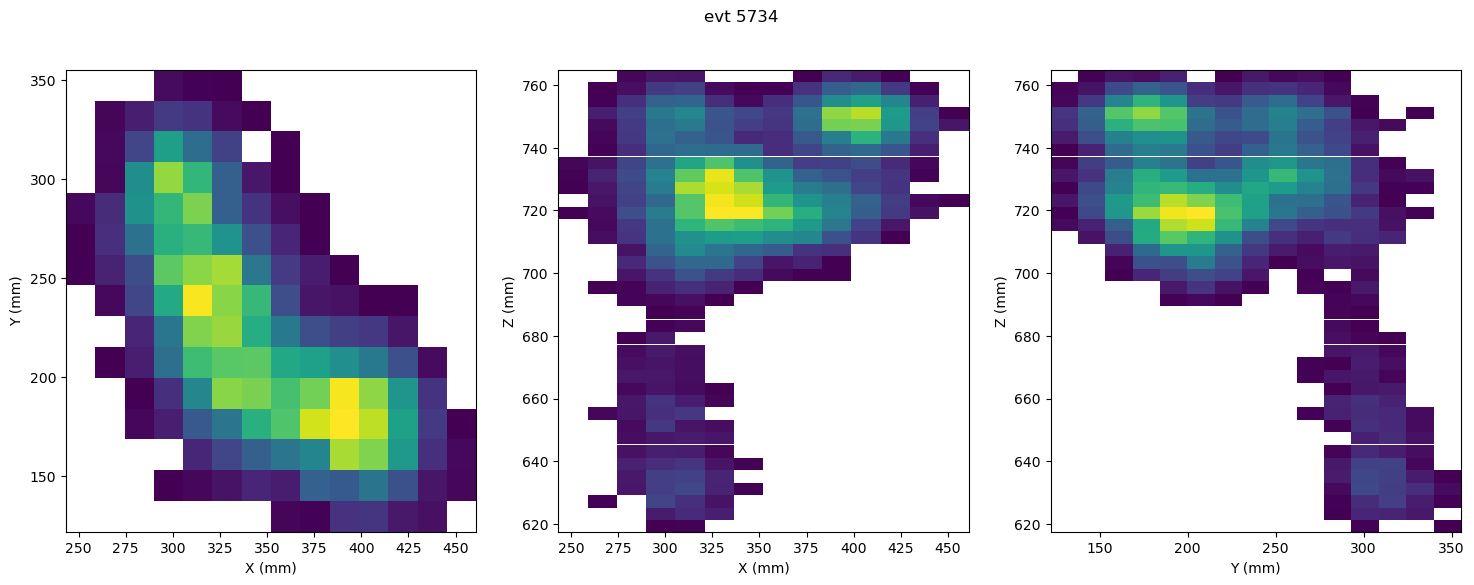

EVT: 1717199
0.2917902644230769


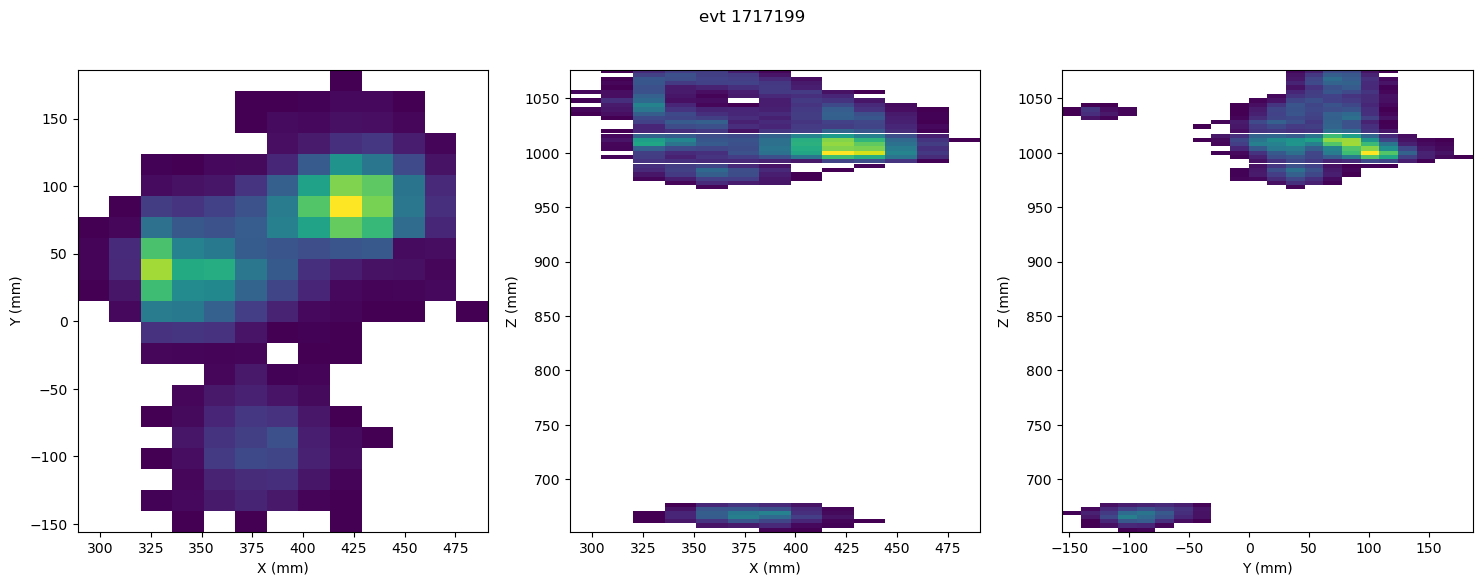

EVT: 1717255
0.9655537347560975


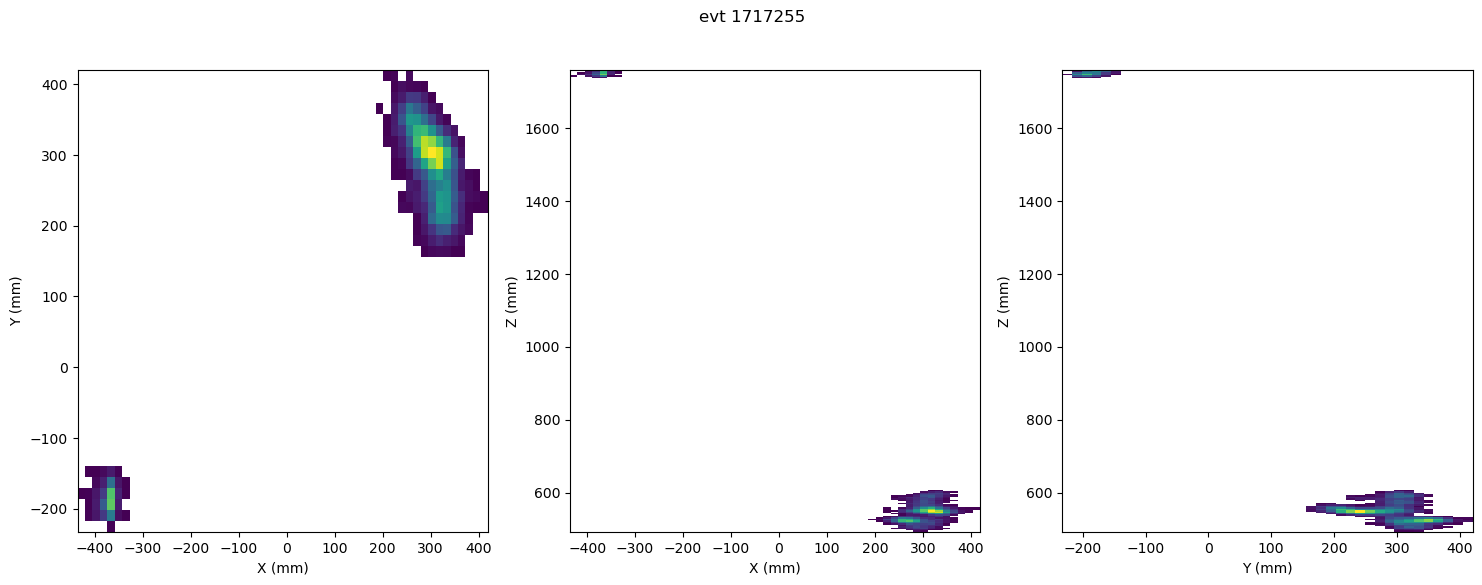

In [14]:
stopper = 5
for i, (evt, df) in enumerate(hits_drop.groupby('event')):
    print('='*20)
    print('='*20)
    print(f'EVT: {evt}')
    print(np.average(np.diff(df.Z.values)))
    raw_plotter(df, evt)

    if i > stopper:
        break